**Tema: Análisis de Videojuegos**

**Autor: Francisco Moyano Escalera**

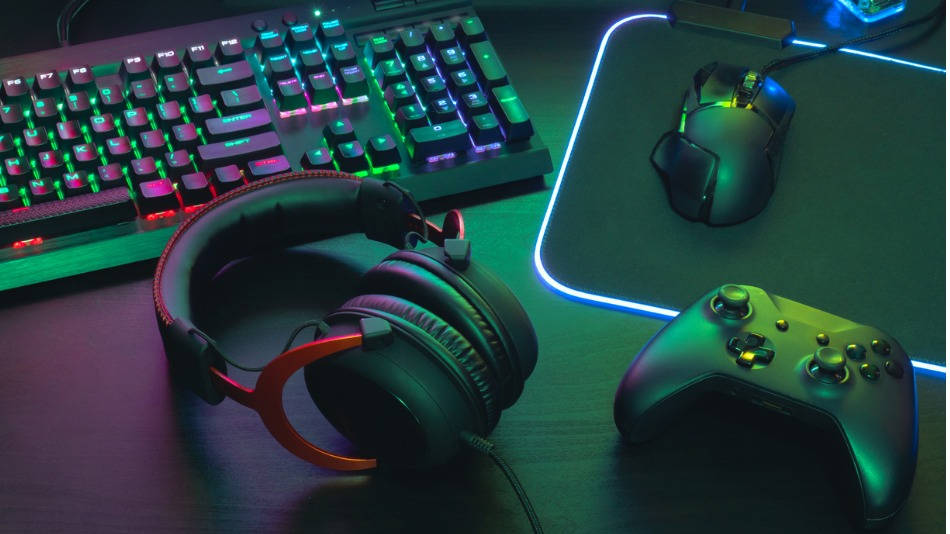

Los videojuegos son un gran negocio, se estima que el mercado mundial de los juegos valga más de $ 300 mil millones para 2027 según Mordor Intelligence. Con tanto dinero en juego, los principales editores de juegos están muy incentivados para crear el próximo gran éxito. Pero, ¿están mejorando los juegos o ya pasó la época dorada de los videojuegos?

En este proyecto se analizarán las puntuaciones de los 400 principales videojuegos otorgadas por usuarios y por críticos, así como los datos de ventas por año desde 1977. Se buscará la época dorada de los videojuegos al identificar los años de lanzamiento que más les gustaron a los usuarios y críticos, a la vez que se explorará el lado comercial de los juegos observando los datos de ventas.

La base de datos contiene dos tablas. Se ha limitado cada tabla a 400 filas para este proyecto, pero es posible encontrar el conjunto de datos completo con más de 13.000 juegos en Kaggle.

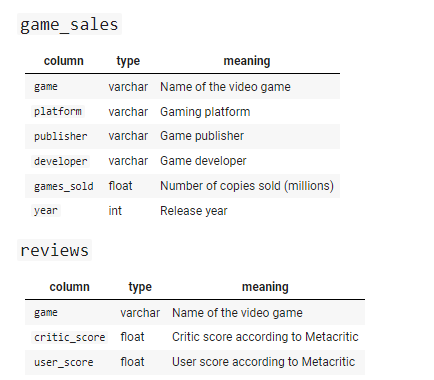

**2) Los diez videojuegos más vendidos**

Se observan algunos de los videojuegos más vendidos de todos los tiempos.

In [ ]:
%%sql 

SELECT * -- Se selecciona toda la información de los diez juegos más vendidos
    FROM game_sales
    ORDER BY games_sold DESC -- Se ordenan los resultados desde el juego más vendidos hasta el número décimo 
    LIMIT 10;

10 rows affected.


game,platform,publisher,developer,games_sold,year
Wii Sports for Wii,Wii,Nintendo,Nintendo EAD,82.90,2006
Super Mario Bros. for NES,NES,Nintendo,Nintendo EAD,40.24,1985
Counter-Strike: Global Offensive for PC,PC,Valve,Valve Corporation,40.00,2012
Mario Kart Wii for Wii,Wii,Nintendo,Nintendo EAD,37.32,2008
PLAYERUNKNOWN'S BATTLEGROUNDS for PC,PC,PUBG Corporation,PUBG Corporation,36.60,2017
Minecraft for PC,PC,Mojang,Mojang AB,33.15,2010
Wii Sports Resort for Wii,Wii,Nintendo,Nintendo EAD,33.13,2009
Pokemon Red / Green / Blue Version for GB,GB,Nintendo,Game Freak,31.38,1998
New Super Mario Bros. for DS,DS,Nintendo,Nintendo EAD,30.80,2006
New Super Mario Bros. Wii for Wii,Wii,Nintendo,Nintendo EAD,30.30,2009


**3) Puntajes de revisión faltantes**

Los videojuegos más vendidos se lanzaron entre 1985 y 2017. Eso es un buen rango; se usarán los datos de la tabla de reseñas para obtener más información sobre los mejores años para los videojuegos.

Primero, es importante explorar las limitaciones de la base de datos. Una gran deficiencia es que no hay datos de reseñas para algunos de los juegos en la tabla game_sales.

In [ ]:
%%sql

-- Se cuenta la cantidad de juegos en los que tanto critic_score como user_score son nulos 
SELECT COUNT(g.game)
FROM game_sales g
LEFT JOIN reviews r
ON g.game = r.game
WHERE critic_score IS NULL AND user_score IS NULL;

 * postgresql:///games
1 rows affected.


count
31


**4) Años con mejores calificaciones por parte de los críticos de videojuegos**

Parece que un poco menos del diez por ciento de los juegos en la tabla game_sales no tienen datos de reseñas. Ese es un porcentaje lo suficientemente pequeño como para poder continuar con la exploración, pero es importante tenerlo en cuenta para consultas más sofisticadas.

In [ ]:
%%sql

SELECT g.year, ROUND(AVG(r.critic_score),2) AS avg_critic_score -- Se selecciona el año de lanzanmiento y el puntaje promedio para ese año
FROM game_sales g
INNER JOIN reviews r -- Se realiza un Join entre las tablas game_sales y reviews 
ON g.game = r.game
GROUP BY g.year -- Se agrupa por año
ORDER BY avg_critic_score DESC -- Se ordenan los datos desde el puntaje de crítica promedio más alto gasta el más bajo en un límite de 10 resultados
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
1998,9.32
2020,9.20
1993,9.10
1995,9.07
2004,9.03
1982,9.00
2002,8.99
1999,8.93


**5) Análisis en detalle del año 1982**

El rango de mejores años según las críticas va desde 1982 hasta 2020. Sin embargo algunos valores del promedio del puntaje otorgado por los críticos parecen números sospechosamente redondos para los promedios, por ejemplo el del año 1982. Tal vez no hubo muchos videojuegos en nuestro conjunto de datos que se lanzaron en ciertos años.

In [ ]:
%%sql

SELECT g.year, COUNT(g.game) AS num_games, ROUND(AVG(r.critic_score),2) AS avg_critic_score -- Se incorpora a la consulta el conteo de juegos lanzados en cada año
FROM game_sales g
INNER JOIN reviews r
ON g.game = r.game
GROUP BY g.year
HAVING COUNT(g.game) > 4 -- Solo se incluyen años con mas de 4 reseñas 
ORDER BY avg_critic_score DESC
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,num_games,avg_critic_score
1998,10,9.32
2004,11,9.03
2002,9,8.99
1999,11,8.93
2001,13,8.82
2011,26,8.76
2016,13,8.67
2013,18,8.66
2008,20,8.63
2012,12,8.62


**6) Qué años quedaron por fuera de la lista de los críticos por tener cuatro o menos juegos?**

La columna num_games muestra una nueva lista de los promedios de puntajes de juegos en años con una cantidad considerable de juegos lanzados. Pero, ¿qué años quedaron exluidos de esta lista por tener cuatro o menos juegos? 
Para continuar se han creado dos tablas con los resultados de las consultas anteriores:

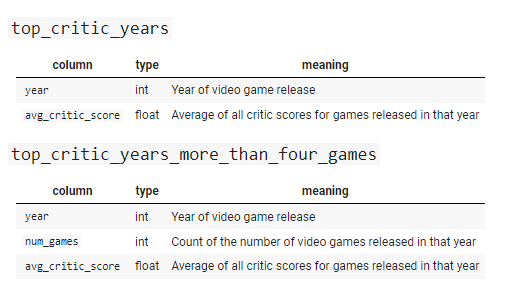

In [ ]:
%%sql 

SELECT year, avg_critic_score -- Se selecciona el año y el puntaje promedio para años que quedaron fuera de la lista
FROM top_critic_years
EXCEPT
SELECT year, avg_critic_score
FROM top_critic_years_more_than_four_games
ORDER BY avg_critic_score DESC; -- Se ordenan los resultados del mayor al menor valor de avg_critic_score 

 * postgresql:///games
6 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
2020,9.20
1993,9.10
1995,9.07
1982,9.00


**7) Años de los videojuegos preferidos por los usuarios**

Según el análisis anterior parece que principios de la década de 1990 podría ser considerada como la edad de oro de los videojuegos basados ​​solo en la puntuación de la crítica, pero sería necesario recopilar más datos de juegos y reseñas para realizar un análisis más detallado.

A continuación se analizarán las opiniones del otro grupo importante de personas, los jugadores. Para comenzar, se creará una consulta muy similar a la que se usó en en punto 4, excepto que esta buscará los promedios de puntuación de usuarios por año en lugar de los promedios de puntuación de críticos.

In [ ]:
%%sql

SELECT g.year, COUNT(g.game) AS num_games, ROUND(AVG(r.user_score),2) AS avg_user_score
FROM game_sales g
INNER JOIN reviews r
ON g.game = r.game
GROUP BY g.year -- se agrupa por año de lanzamiento
HAVING COUNT(g.game) > 4 -- se incluyen solo años con más de 4 juegos
ORDER BY avg_user_score DESC -- se ordena por el puntaje promedio de forma decreciente y se limita a 10 resultados
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,num_games,avg_user_score
1997,8,9.50
1998,10,9.40
2010,23,9.24
2009,20,9.18
2008,20,9.03
1996,5,9.00
2005,13,8.95
2006,16,8.95
2000,8,8.80
1999,11,8.80


**8) Años preferidos tanto por los jugadores como por la crítica**

En la consultas anteriores se obtuvo una lista de los diez mejores años según las reseñas de los críticos y las reseñas de los usuarios. ¿Hay algún año que apareció en ambas tablas? De ser así podría ser considerado el año de oro de los videojuegos. Se tiene acceso a la tabla top_critic_years_more_than_four_games, que almacena los resultados de la consulta de los críticos, y ahora se agregan los resultados de la consulta de preferencia de los usuarios en una tabla.



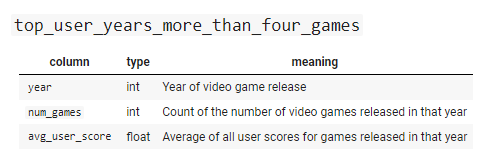

In [ ]:
%%sql 

-- Se seleccionan los años que aparecen en ambas tablas
SELECT year
FROM top_user_years_more_than_four_games
INTERSECT
SELECT year
FROM top_critic_years_more_than_four_games;

 * postgresql:///games
3 rows affected.


year
1998
2008
2002


**9) Ventas en los mejores años de los videojuego**

Se observa que tenemos tres años en los que tanto los usuarios como los críticos estuvieron de acuerdo en estar entre los diez primeros! Se sabe que a críticos y jugadores les gustaron estos años, pero ¿qué pasa con los creadores de videojuegos? ¿Fueron buenas las ventas?

En este caso no se han guardado los resultados de la consulta anterior en una tabla, en su lugar se usará la consulta anterior como una subconsulta.

In [ ]:
%%sql 

SELECT g.year, SUM(g.games_sold) AS total_games_sold -- se selecciona el año de lanzamiento y la suma de las ventas
FROM game_sales g
WHERE g.year IN (SELECT year -- se filtra por los años de preferencia de críticos y usuarios
FROM top_user_years_more_than_four_games
INTERSECT
SELECT year
FROM top_critic_years_more_than_four_games)
GROUP BY g.year
ORDER BY total_games_sold DESC; -- se ordena el resultado por la suma de ventas por año en forma descendente

 * postgresql:///games
3 rows affected.


year,total_games_sold
2008,175.07
1998,101.52
2002,58.67
